# EDSA - Climate Change Belief Analysis 2022
Predict a# Team_ES3 Climate Change Belief Analysis 2022

Predict an individual’s belief in climate change based on historical tweet data

###### Members
1. Oguntuwase Samson
2. Jeff Ouma
3. Odukoya Adewale Daniel
4. Thapelo Mofokeng
5. Adebayo Salaudeen

# Table of Contents

* 1. Introduction
    - 1.1 Predict Overview
    - 1.2 Data Description
* 2. Imports
* 3. Importing the dataset
* 4. Exploratory Data Analysis
* 5 Distribution of target variable
    - 5.1 Text Cleaning
* 6 Data Preprocessing
    - 6.1 Merge  datasets
    - 6.2 Converting html entities
    - 6.3 Changing Tweets into lowercase
    - 6.4 Word Tokenization
    - 6.5 Removing Stop Words
    - 6.6 Word Stemming
* 7 Feature Engineering
    - 7.1 Split data into Train & Test sets
    - 7.2 CountVectorizer
    - 7.3 Building the pipeline
* 8. Modeling
    - 8.1 Train-test split
    - 8.2 Model training
    - 8.3 Tuning the chosen models
* 9. Generating a submission file
* 10. References
    

# 1. INTRODUCTION
## PREDICT OVERVIEW

### Predict an individual’s belief in climate change based on historical tweet data
#### Problem statement

###### Using Twitter to measure the impact of climate change:
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging Team_ES3  during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.
<div align="center" style="width: 500px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://media.tenor.com/images/47d160eabb0927ed23827ab099ee83c3/tenor.gif"
     alt="Dummy image 1"
     style="float: center; padding-bottom=0.5em"
     width=500px/>

### Data Description
Data The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

Class Description
* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

Variable definitions
- sentiment: Sentiment of tweet
- message: Tweet body
- tweetid: Twitter unique id

<a id="2"></a>

# **2. Imports**
Will import necessary packages for data manupulation e.g numpy, data viewing e.g pandas, plotting e.g matplot library, seaborn and additional packages for text processing and numerical computations

In [1]:
#packages for general processing of data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
%matplotlib inline
import seaborn as sns
import re
import colorama
from colorama import Fore, Back, Style
import warnings
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
from statistics import *
from plotly import tools
from tqdm import tqdm
import csv
import nltk
import spacy
import string
# set plot style
sns.set()
sns.set(font_scale=1.5)
#style.use('seaborn-pastel')
#style.use('seaborn-poster')

#packages for natural language processing
nlp = spacy.blank('en')
nlp = spacy.blank('zh')
nlp = spacy.blank('xx') # multilanguage (spaCy provides support for languages) 
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
lemmatizer = WordNetLemmatizer()
import string
import en_core_web_sm
from collections import Counter
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet  
from sklearn.feature_extraction.text import CountVectorizer   
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.model_selection import train_test_split, RandomizedSearchCV

#Packages for machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#packages for checking the performance of the models used
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#packages for web scraping
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re


#packages for balancing our data
from sklearn.utils import resample
import imblearn
from imblearn.over_sampling import SMOTE

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SAMSON\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SAMSON\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAMSON\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SAMSON\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<a id="3"></a>
# **3. Importing the dataset**
We are ready with all the packages required for the data processing. The next step is to import the available data for analysis.
>For the purpose of this project, we have been provided with the following data:
>1. df_train.csv :- This data wil be using for training our model
>2. df_test.csv :- This data will test our model for the purpose of kaggle competition
>3. Sample_submission.csv :- Contain a sample submission on kaggle

In [2]:
df_train = pd.read_csv('./train.csv') # This code imports the train data 
df_test = pd.read_csv('./test.csv') # This code import the test data
sample = pd.read_csv('./sample_submission.csv') #This code imports a sample submission data

In [3]:
# let's examine the first five (5) row of the train data
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [4]:
# the first five for the test data
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


## Summary 
let examining the properties of our data

In [5]:
df_train.shape

(15819, 3)

In [6]:
df_test.shape

(10546, 2)

Our train contains 15819 rows, 3 columns and our test data contains 10546 rows, two columns.

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [8]:
# let check for missing value in the test and train data
df_train.isnull().sum(axis=0)

sentiment    0
message      0
tweetid      0
dtype: int64

In [9]:
df_test.isnull().sum(axis=0)

message    0
tweetid    0
dtype: int64

We don't have missing values in our dataset

<a id="4"></a>

# **4. Exploratory Data Analysis**
The following section provides an overview of the given data. We looks at  some key insights of the raw data as well as the sentiment distribution of the data. In addition we will visualise the word frequency of messages of the unprocessed train and test data.
We will try to dig deep into both the training and testing data to ensure that our data meets the following:
>1. Correctly formatted
>2. Have the correct data types
>3. No null values
>4. Correctly distributed ie normally distributed
>5. No coliniarity for classification problem or no multicoliniarity for regression problem

Exploratory data analysis is the key that will lead us to feature engineering and choosing the right machine learning algorithm for our data

In [10]:
#We start by checking the features available in our training data
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [11]:
#we also check the column names as follows
print(df_train.columns.to_list())

['sentiment', 'message', 'tweetid']


In both cases, we see three columns i:e sentiment(the y variable based on the predict), message and tweetid (the unique identification of each entry)

In [12]:
#lets see the columns for the test data
print(df_test.columns.to_list())

['message', 'tweetid']


It makes sense for the test data to lack sentiment i.e the y variable. This means we are good to go

We then focus on the y variable and check how it is distributed. For logistic regression, we expect the observations in both uniques y to be closely the same in  terms of each count.

In [13]:
#This code will check howthe sentiments are distributed 
df_train.groupby(by='sentiment').count() #we check the distribution of the sentiment

,message,tweetid
sentiment,,
-1,1296,1296
0,2353,2353
1,8530,8530
2,3640,3640


Let's plot that in a pie chart showing the percentage of the unique y observations

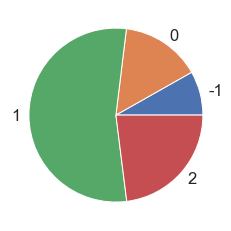

In [14]:
m = df_train.groupby(by='sentiment').count() #this code group the train data by sentiment and make a count of each group
values = m['message'].to_list() # values contain the total counts of each group
m_index = m.index.to_list() # m_index contain the label of each group

#the code below will plot a pie chart showing the percentage of each sentiment
plt.pie(values, labels=m_index)
plt.show()

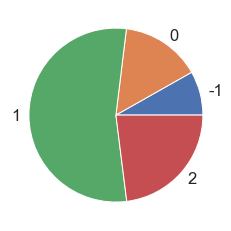

In [15]:
n = df_train.groupby(by='sentiment').count() #this code group the test data by sentiment and make a count of each group
values = n['message'].to_list() # values contain the total counts of each group
n_index = n.index.to_list() # n_index contain the label of each group

#the code below will plot a pie chart showing the percentage of each sentiment
plt.pie(values, labels=n_index)
plt.show()

It is not enough to just visualize this on a pichart but rather try to visualize how far each group is from another. We therefore use a bar graph to achieve our goal athough is obvious we have imbalance dataset

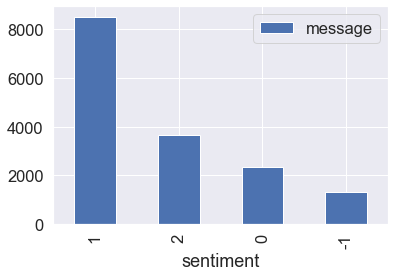

In [16]:
#this code will plot the distribution of the sentiments on a bar graph
sum_df = df_train[['sentiment', 'message']].groupby('sentiment').count()

# Plot message by sentiment
sum_df.sort_values('message', ascending=False).plot(kind='bar')
plt.show()

In [17]:
# Looking for duplicates
percent_duplicates = round((1-(df_train['message'].nunique()/len(df_train['message'])))*100,2)
print('Duplicated tweets in train data:')
print(percent_duplicates,'%')

Duplicated tweets in train data:
10.05 %


For us to know how to tweek this data for best prediction results. We seek to understand the trends within our features. will check for the following:
> 1. Punctuation 
> 2. stopwords words
> 3. Single Words being used in singular and plural plural form.
> 4. Check for links

In [18]:
#will create a random set of data for our analysis. Will majorly focus on the message feature

import random # random will help fetch random index

#we dont want to interfear with the index of our dataset here, we therefore make a copy for our analysis here
eda_df = df_train.copy()

#for our plan to work as expected, will need to rearange the index of our data set
eda_df = eda_df.reset_index().drop('index', axis = 1)

n = len(eda_df.index.to_list()) #n represent the total number of observations in the whole data set

#we make a list of 10 randomly chosen index from our data
i = 0
check_list = []
while i<10:
    j = random.randint(0,n)
    check_list.append(j)
    i = i+1  

#we make a list of random data from the 10 randomly chosen index
random_data = []
for i in check_list:
    random_data.append(eda_df.message[i].split())
    
plain_random_data = []
for i in random_data:
    for k in i:
        plain_random_data.append(k)
        
#the study data is now redy for use and are stored in a variable called plain_random_data. Lets dive in

In [19]:
#we check the subset of the availabledata and see what operations we can perform
plain_random_data[:5]

['Rex', 'Tillerson', 'used', 'fake', 'name']

1. Checking for punctuations

In [20]:
import string

#we split the punctuations from the tring
punctuations = []
l = string.punctuation
for i in l:
    punctuations.append(i)

#create a bag of letters for analysis
bag_of_letters = []
for i in plain_random_data:
    for k in i:
        bag_of_letters.append(k)

#we create a list of all available punctuations for futher use as well
total_punctuations = []
for i in bag_of_letters:
    if i in punctuations:
        total_punctuations.append(i)

Total punctuations = 77/1037 letters
This accounts to  7.425265188042431%


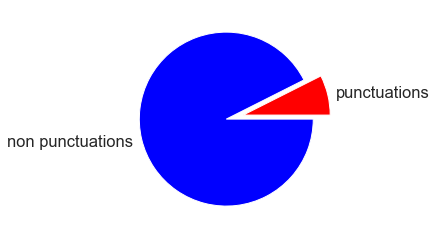

In [21]:
##lets check if we manage to catch some punctuations in our sample

print(f'Total punctuations = {len(total_punctuations)}/{len(bag_of_letters)} letters')
print(f'This accounts to  {(len(total_punctuations)/len(bag_of_letters))*100}%')

percentage_punctuations = np.round((len(total_punctuations)/len(bag_of_letters))*100, 2)

plt.pie([percentage_punctuations, 100-percentage_punctuations], 
        labels=['punctuations','non punctuations'], explode = [0,0.2], colors = ['red','blue'])
plt.show()

2. checking for stop words

In [22]:
#first we import stopwords and define stopwords_list
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')

#we store all available stopwords in our data in a list called available_stopwords
available_stopwords = []
for i in plain_random_data:
    if i in stopwords_list:
        available_stopwords.append(i)

Total stopwords = 33/166 words
This accounts to  19.879518072289155%


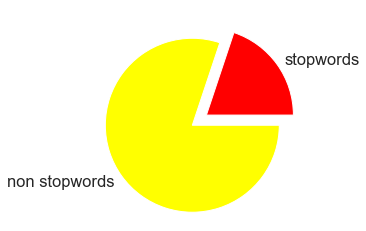

In [23]:
##lets check if we manage to catch some stopwords in our sample

print(f'Total stopwords = {len(available_stopwords)}/{len(plain_random_data)} words')
print(f'This accounts to  {(len(available_stopwords)/len(plain_random_data))*100}%')

percentage_stopwords = np.round((len(available_stopwords)/len(plain_random_data))*100, 2)

plt.pie([percentage_stopwords, 100-percentage_stopwords], 
        labels=['stopwords','non stopwords'], explode = [0,0.2], colors = ['red','yellow'])
plt.show()

In [24]:
#to check for this, we need to know the total number of unique words in our sample and set it to words_unique  variable
total_words_unique = len(np.unique((np.array(plain_random_data))))

#if we therefore perform steming and the total number of unue words reduce, then we can know where to stand

#we import the snowballstemmer and set it to english
from nltk import SnowballStemmer
stemmer = SnowballStemmer('english')

#create a list of stemmed sample
new_plain_random_data = []

for i in plain_random_data:
    new_plain_random_data.append(stemmer.stem(i))
    
new_total_words_unique = len(np.unique((np.array(new_plain_random_data))))

Total unique words before steming = 130
Total unique words after steming = 124
This accounts to  4.615384615384613 % of the total words


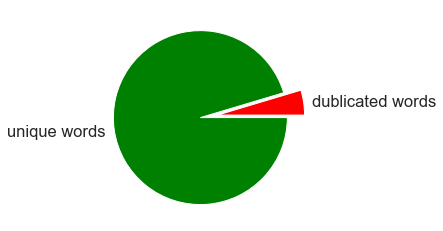

In [25]:
#lets confirm if anything happened
print(f'Total unique words before steming = {total_words_unique}')
print(f'Total unique words after steming = {new_total_words_unique}')
print(f'This accounts to  {100-((new_total_words_unique/total_words_unique)*100)} % of the total words')

#plot a pie chart to show the results
percentage_dublicate_words = np.round(100-((new_total_words_unique/total_words_unique)*100),2)
plt.pie([percentage_dublicate_words, 100-percentage_dublicate_words], 
        labels=['dublicated words','unique words'], explode = [0,0.2], colors = ['red','green'])
plt.show()

4. checking for links

In [26]:
#This code will loop through the sample to get all links  and store them in a variable total_links
total_links = []
for i in plain_random_data:
    if i[:4] in 'http':
        total_links.append(i)

Total available links = 8 links
This account to  4.819277108433735 % of the total words


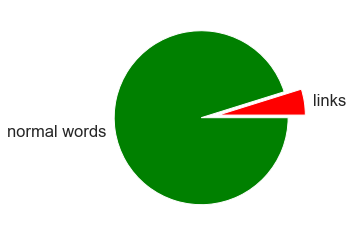

In [27]:
#Lets check if we mange to find some links within our sample
print(f'Total available links = {len(total_links)} links')
print(f'This account to  {(len(total_links)/len(plain_random_data))*100} % of the total words')

percentage_links = np.round((len(total_links)/len(plain_random_data))*100,2)

plt.pie([percentage_links, 100-percentage_links], 
        labels=['links','normal words'], explode = [0,0.2], colors = ['red','green'])
plt.show()

5. checking if we can get something from the links

For this purpose, will try to dig into the available links and check through their title if we can find some information. Will import beautiful soup for the purpose of web scarping.

In [28]:
for i in plain_random_data:
    if i[:4] in 'http':
        try:
            html = urlopen(i)
        except:
            html = 'url_web'
        soup = BeautifulSoup(html)
        try:
            title = soup.title.text
        except AttributeError:
            title = 'url_web'
        except:
            title = 'url_web'
        print(f'{i} == {title}')      

https://t.co/0guMn3nkW3 == Rex Tillerson: Secretary of State used fake name ‘Wayne Tracker’ to discuss climate change while Exxon Mobil CEO | The Independent | The Independent
https://t.co/rWRkv0ciUq == url_web
https://t.co/fQuOj42kvI == url_web
https://t.co/PwYNAGLK9T == url_web
https://t.co/CWCUdLHq6p == url_web
https://t.co/SjoFoNÃ¢â‚¬Â¦ == url_web
https://t.co/KhZPkjWs6w == At G-20, world aligns against Trump policies ranging from free trade to climate change - The Washington Post
https://t.co/1Dbbs7QCB9 == url_web


### Key take aways from EDA

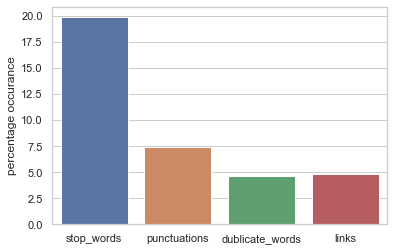

In [29]:
#We plot a graph to show the stats from our sample
percentages = [percentage_stopwords,percentage_punctuations,percentage_dublicate_words,percentage_links]
sns.set_theme(style='whitegrid')
fig = sns.barplot(x = ['stop_words', 'punctuations', 'dublicate_words', 'links'],y = percentages)
fig.set(xlabel ='',ylabel='percentage occurance')
plt.show()

In [41]:
def update(df):

    df = df_train.copy()
    sentiment = df['sentiment']
    word_sentiment = []

    for i in sentiment :
        if i == 1 :
            word_sentiment.append('Pro')
        elif i == 0 :
            word_sentiment.append('Neutral')
        elif i == -1 :
            word_sentiment.append('Anti')
        else :
            word_sentiment.append('News')

    df['sentiment'] = word_sentiment
    
    return df

df = update(df_train)
df.head()

,sentiment,message,tweetid
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221
1,Pro,It's not like we lack evidence of anthropogeni...,126103
2,News,RT @RawStory: Researchers say we have three ye...,698562
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


#### Hashtag extraction
Hashtags are extracted from the original tweets and stored in seperate dataframes for each class. This is done before tweet cleaning to ensure no information is lost.

In [42]:
def hashtag_extract(tweet):
    hashtags = []
    
    for i in tweet:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
        
    hashtags = sum(hashtags, [])
    frequency = nltk.FreqDist(hashtags)
    
    hashtag_df = pd.DataFrame({'hashtag': list(frequency.keys()),
                       'count': list(frequency.values())})
    hashtag_df = hashtag_df.nlargest(15, columns="count")

    return hashtag_df

# Extracting the hashtags from tweets in each class
pro = hashtag_extract(df['message'][df['sentiment'] == 'Pro'])
anti = hashtag_extract(df['message'][df['sentiment'] == 'Anti'])
neutral = hashtag_extract(df['message'][df['sentiment'] == 'Neutral'])
news = hashtag_extract(df['message'][df['sentiment'] == 'News'])

pro.head()

,hashtag,count
19,climate,187
24,BeforeTheFlood,129
68,climatechange,94
13,ImVotingBecause,62
4,COP22,59


In [43]:
def TweetCleaner(tweet):
    # Convert everything to lowercase
    tweet = tweet.lower() 
    
    # Remove mentions   
    tweet = re.sub('@[\w]*','',tweet)  
    
    # Remove url's
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)    
    
    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)  
    
    # Remove punctuation
    tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", ' ', tweet)
    
    # Remove that funny diamond
    tweet = re.sub(r"U+FFFD ", ' ', tweet)
    
    # Remove extra whitespace
    tweet = re.sub(r'\s\s+', ' ', tweet)
    
    # Remove space in front of tweet
    tweet = tweet.lstrip(' ')                        
    
    return tweet

# Clean the tweets in the message column
df['message'] = df['message'].apply(TweetCleaner)
df['message'] = df['message'].apply(TweetCleaner)

df.head()

,sentiment,message,tweetid
0,Pro,polyscimajor epa chief doesn t think carbon di...,625221
1,Pro,it s not like we lack evidence of anthropogeni...,126103
2,News,rt researchers say we have three years to act ...,698562
3,Pro,wired was a pivotal year in the war on climate...,573736
4,Pro,rt it s and a racist sexist climate change den...,466954


In [44]:
# Extract tweets from dataframe & creating a new dataframe with only tweets
raw_tweets = df['message']

# View top 5 rows of raw_tweets
raw_tweets[3010:3015]

3010    sorry at drivenorth\nbut at communism_kills\ny...
3011    rt climate change myth and religion fighting c...
3012    as reported by the latest claims the truth aro...
3013    it s ok according to the noted science donald ...
3014    u really out here on twitter expecting everybo...
Name: message, dtype: object

#### Tweet cleaning
Remove 'noisy entities' such as URL's, punctuations, mentions, numbers and extra white space. The data is further normalized by converting all letters to lowercase.

#### Parts of speech tagging and lemmatization
In this step we start by determining the length of each tweet and storing this information in a new column. We then tokenize the tweets before performing POS tagging on each word followed by lemmatization.

In lemmatization, we reduce the word into dictionary root form. For instance "cats" is converted into "cat". Lemmatization is done in order to avoid creating features that are semantically similar but syntactically different. Lemmatization is preferred over stemming since stemming is a crude method for cataloging related words; it essentially chops off letters from the end until the stem is reached. This works fairly well in most cases, but unfortunately English has many exceptions where a more sophisticated process is required

In [46]:
def lemma(df):
    df['length'] = df['message'].str.len()
    df['tokenized'] = df['message'].apply(word_tokenize)
    df['pos_tags'] = df['tokenized'].apply(nltk.tag.pos_tag)

    def get_wordnet_pos(tag):

        if tag.startswith('J'):
            return wordnet.ADJ

        elif tag.startswith('V'):
            return wordnet.VERB

        elif tag.startswith('N'):
            return wordnet.NOUN

        elif tag.startswith('R'):
            return wordnet.ADV
    
        else:
            return wordnet.NOUN
        
    wnl = WordNetLemmatizer()
    df['pos_tags'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
    df['lemmatized'] = df['pos_tags'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
    df['lemmatized'] = [' '.join(map(str, l)) for l in df['lemmatized']]  
    return df

df = lemma(df)
df.head()

,sentiment,message,tweetid,length,tokenized,pos_tags,lemmatized
0,Pro,polyscimajor epa chief doesn t think carbon di...,625221,102,"[polyscimajor, epa, chief, doesn, t, think, ca...","[(polyscimajor, a), (epa, n), (chief, n), (doe...",polyscimajor epa chief doesn t think carbon di...
1,Pro,it s not like we lack evidence of anthropogeni...,126103,62,"[it, s, not, like, we, lack, evidence, of, ant...","[(it, n), (s, v), (not, r), (like, n), (we, n)...",it s not like we lack evidence of anthropogeni...
2,News,rt researchers say we have three years to act ...,698562,86,"[rt, researchers, say, we, have, three, years,...","[(rt, n), (researchers, n), (say, v), (we, n),...",rt researcher say we have three year to act on...
3,Pro,wired was a pivotal year in the war on climate...,573736,54,"[wired, was, a, pivotal, year, in, the, war, o...","[(wired, v), (was, v), (a, n), (pivotal, a), (...",wire be a pivotal year in the war on climate c...
4,Pro,rt it s and a racist sexist climate change den...,466954,81,"[rt, it, s, and, a, racist, sexist, climate, c...","[(rt, v), (it, n), (s, n), (and, n), (a, n), (...",rt it s and a racist sexist climate change den...


#### Word frequency
Creating separate dataframes to store the 25 most frequent words and their respective frequencies for each class. Once this information has been extracted we will use these words to create wordclouds for each class.

Word clouds are a popular approach in nlp tasks, here they help us visualize and gain a better understanding of what is being said in each class.

In [48]:
def frequency(tweet):
    # Count vectorizer excluding english stopwords
    cv = CountVectorizer(stop_words='english')
    words = cv.fit_transform(tweet)
    
    # Count the words in the tweets and determine the frequency of each word
    sum_words = words.sum(axis=0)
    words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    # Create a dataframe to store the top 25 words and their frequencies
    frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
    frequency = frequency.head(25)
    
    return frequency

# Extract the top 25 words in each class
pro_frequency = frequency(df['lemmatized'][df['sentiment']=='Pro'])
anti_frequency = frequency(df['lemmatized'][df['sentiment']=='Anti'])
news_frequency = frequency(df['lemmatized'][df['sentiment']=='News'])
neutral_frequency = frequency(df['lemmatized'][df['sentiment']=='Neutral'])

In [50]:
# Extract the words in the tweets for the pro and anti climate change classes 
anti_words = ' '.join([text for text in anti_frequency['word']])
pro_words = ' '.join([text for text in pro_frequency['word']])
news_words = ' '.join([text for text in news_frequency['word']])
neutral_words = ' '.join([text for text in neutral_frequency['word']])

# Create wordcloud for the anti climate change class
anti_wordcloud = WordCloud(width=800, 
                           height=500, 
                           random_state=110, 
                           max_font_size=110, 
                           background_color='white',
                           colormap="Reds").generate(anti_words)

# Create wordcolud for the pro climate change class
pro_wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=73, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Greens").generate(pro_words)

# Create wordcolud for the news climate change class
news_wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=0, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Blues").generate(news_words)

# Create wordcolud for the neutral climate change class
neutral_wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=10, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Oranges").generate(neutral_words)

pro_frequency.tail()

,word,freq
20,http,359
21,make,322
22,like,318
23,warm,313
24,husband,312


#### Specific named entity recognition and extraction
Extracting the top 10 organisations, people and geopolitical entities in each class. This information is then stored in separate dataframes for each class.

In [52]:
def entity_extractor(tweet):
    
    def get_people(tweet):  
        words = nlp(tweet)
        people = [w.text for w in words.ents if w.label_== 'PERSON']
        return people
    
    def get_org(tweet):
        words = nlp(tweet)
        org = [w.text for w in words.ents if w.label_== 'ORG']
        return org
    
    def get_gpe(tweet):
        words = nlp(tweet)
        gpe = [w.text for w in words.ents if w.label_== 'GPE']
        return gpe
    
    # Extract the top 10 people
    people = tweet.apply(lambda x: get_people(x)) 
    people = [x for sub in people for x in sub]
    people_counter = Counter(people)
    people_count = people_counter.most_common(10)
    people_count = map(list, zip(*people_count))
    
    # Extract the top 10 organizations
    org = tweet.apply(lambda x: get_org(x)) 
    org = [x for sub in org for x in sub]
    org_counter = Counter(org)
    org_count = org_counter.most_common(10)
    org_count = map(list, zip(*org_count))
    
    # Extract the top 10 geopolitical entities
    gpe = tweet.apply(lambda x: get_gpe(x)) 
    gpe = [x for sub in gpe for x in sub]
    gpe_counter = Counter(gpe)
    gpe_count = gpe_counter.most_common(10)
    gpe_count = map(list, zip(*gpe_count))
    
    # Create a dataframe to store the information
    df = pd.DataFrame({'people' : people})
    df['geopolitics'] = gpe
    df['organizations'] = org
    
    return df

# Extract top entities for each class
anti_info = entity_extractor(df['lemmatized'][df['sentiment']== 'Anti'])
pro_info = entity_extractor(df['lemmatized'][df['sentiment']== 'Pro'])
news_info = entity_extractor(df['lemmatized'][df['sentiment']== 'News'])
neutral_info = entity_extractor(df['lemmatized'][df['sentiment']== 'Neutral'])

C:\Users\SAMSON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\SAMSON\AppData\Local\Temp/ipykernel_6100/3927958233.py:20: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



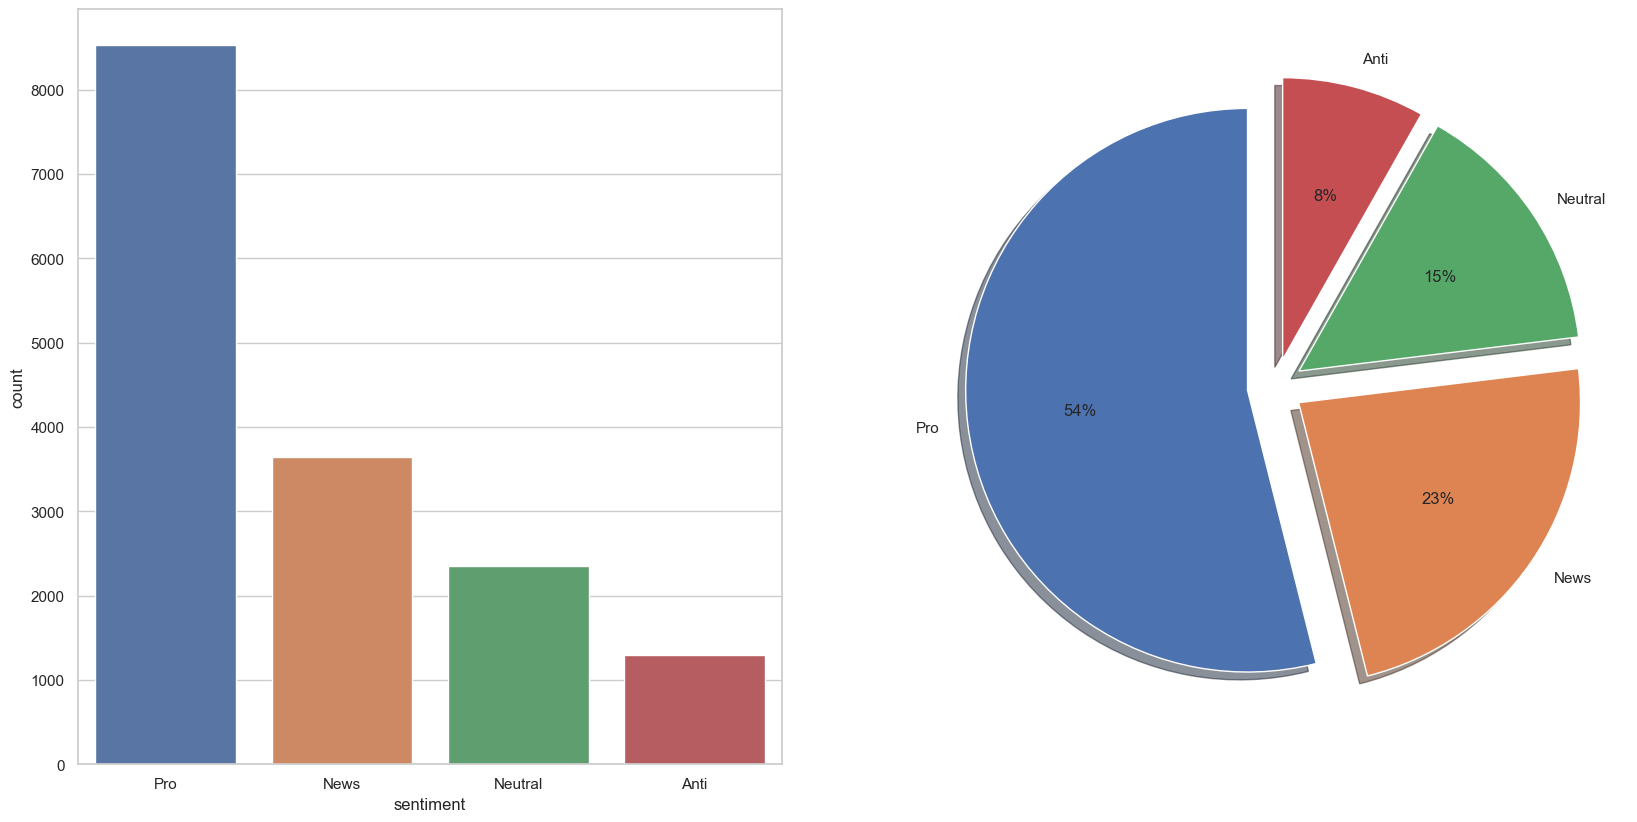

In [54]:
# Display target distribution
#style.use('seaborn-pastel')

fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         figsize=(20, 10), 
                         dpi=100)

sns.countplot(df['sentiment'], ax=axes[0])

labels=['Pro', 'News', 'Neutral', 'Anti'] 

axes[1].pie(df['sentiment'].value_counts(),
            labels=labels,
            autopct='%1.0f%%',
            shadow=True,
            startangle=90,
            explode = (0.1, 0.1, 0.1, 0.1))

fig.show()

#### Tweet length distribution
From the plots below we can see that tweets that fall in the pro climate change class are generally longer and the shortest tweets belong to the anti climate change class. We also notice that neutral climate change tweets tend to have the most variability in tweet length.

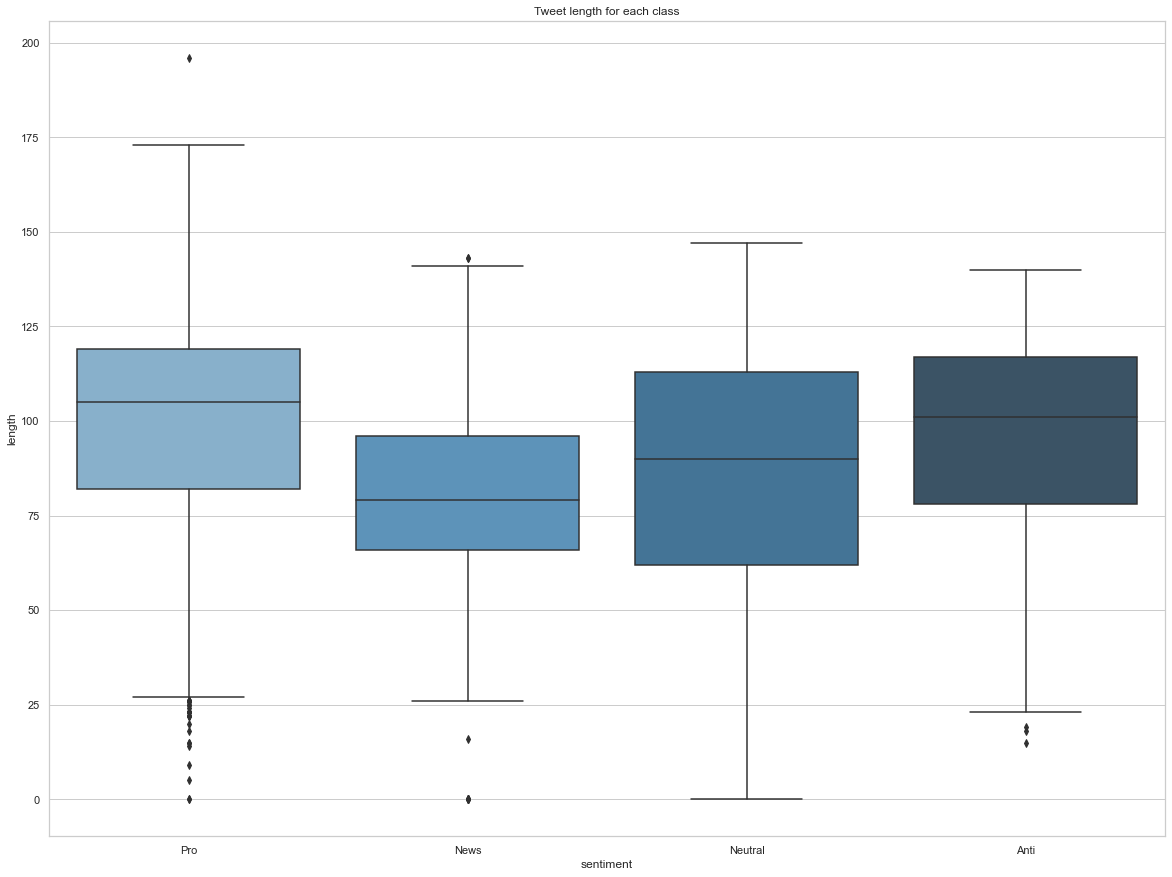

In [56]:
# Plot the distribution of the length tweets for each class using a box plot
sns.boxplot(x=df['sentiment'], y=df['length'], data=df, palette=("Blues_d"))
plt.title('Tweet length for each class')
plt.show()

#### Climate change common words
The figures below display the 25 most common words found in the tweets for each classes.

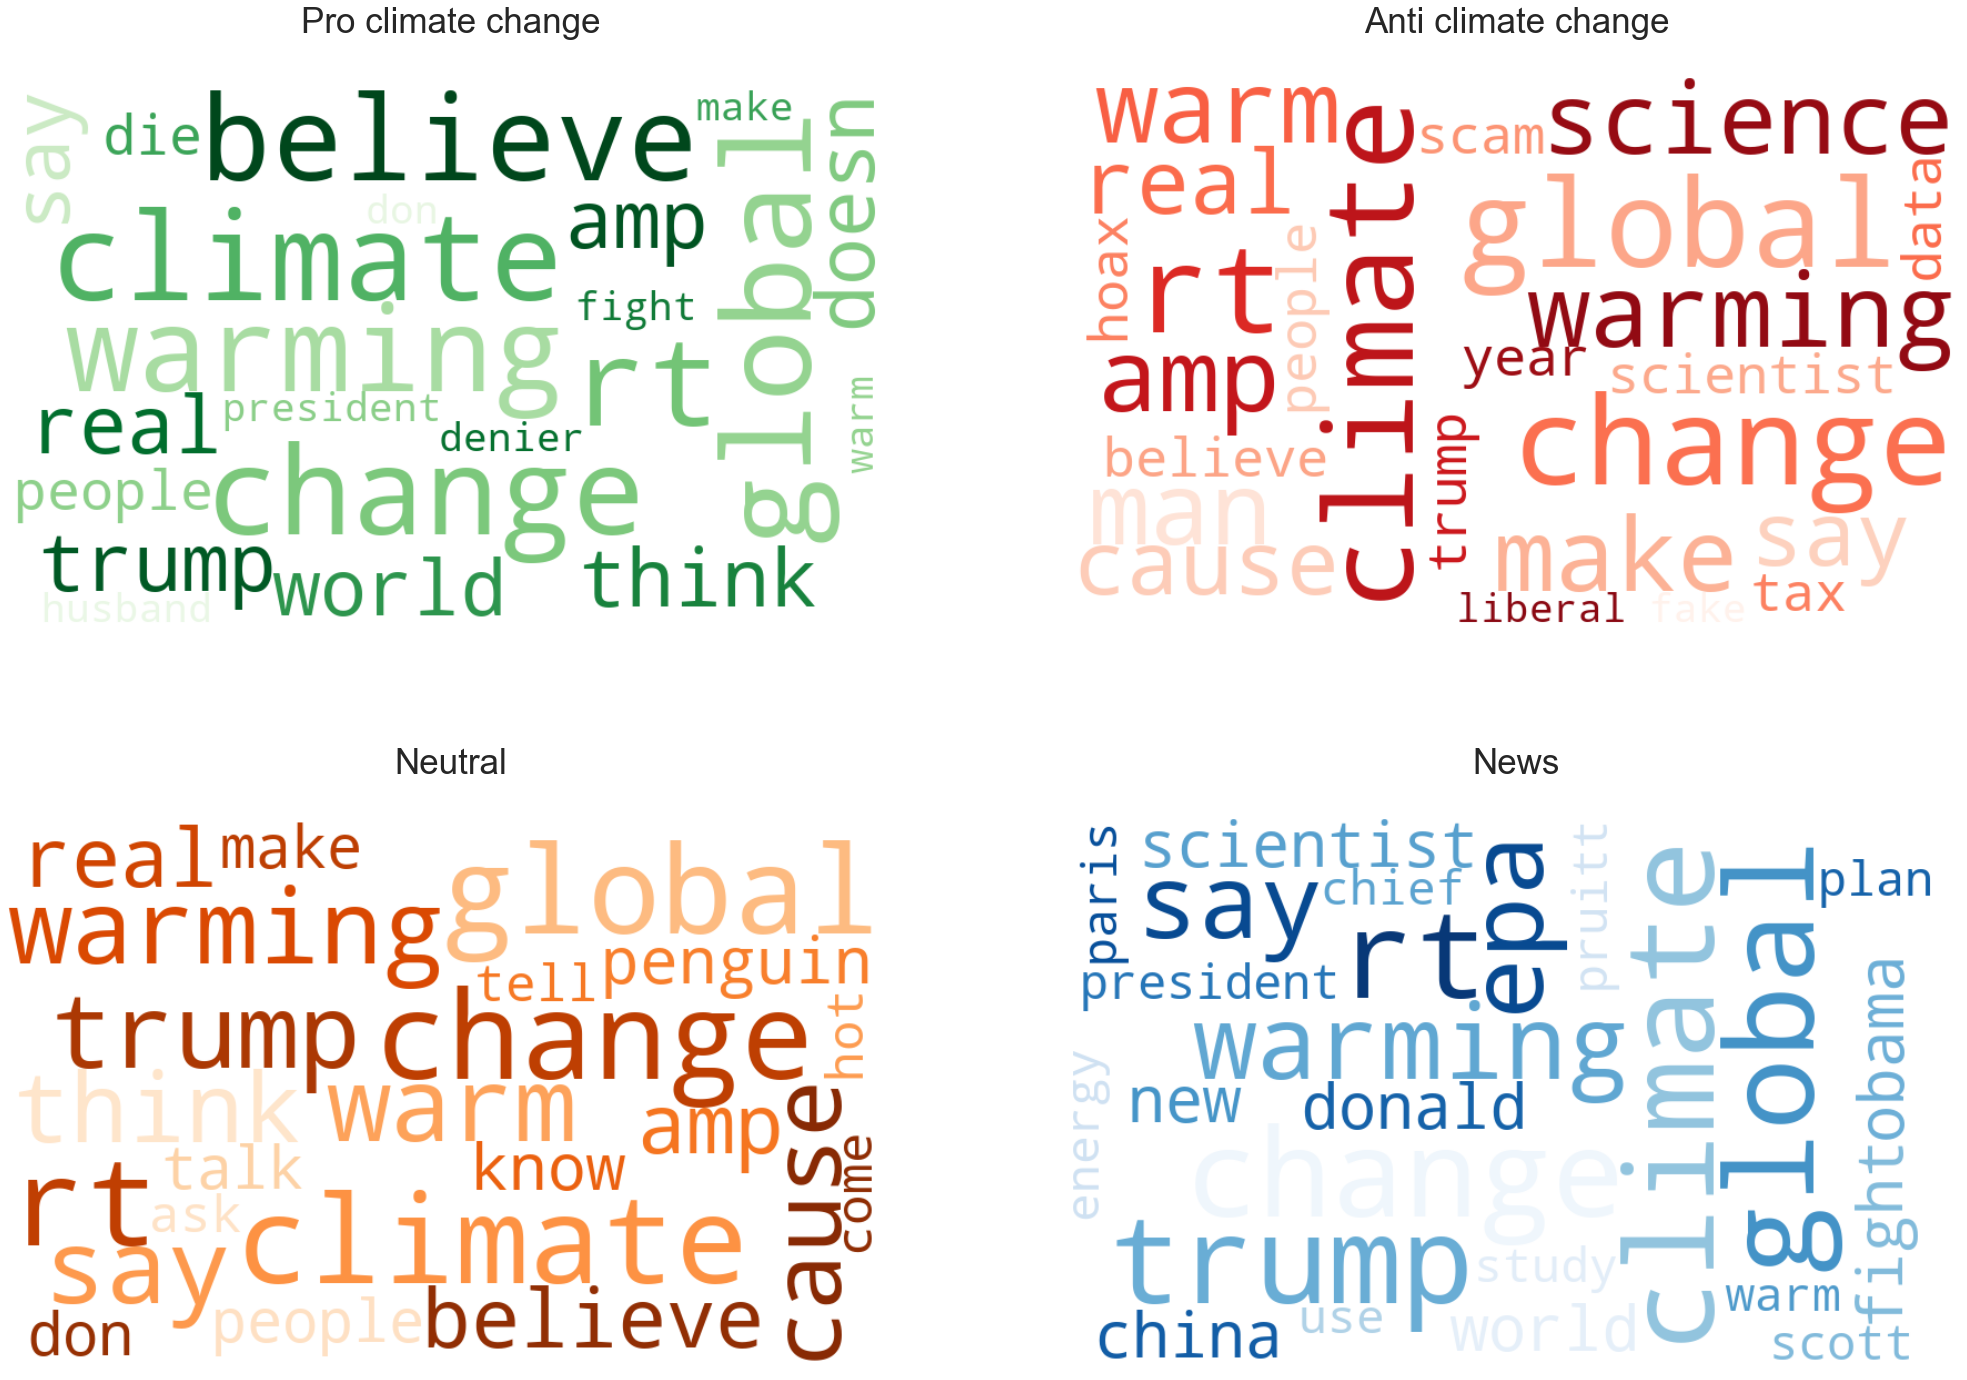

Pro climate change buzzwords 20-25 shown here for clarity 
- The wordcloud doesn't seem to pick up on 'http'


,word,freq
20,http,359
21,make,322
22,like,318
23,warm,313
24,husband,312


In [57]:
# Plot pro and anti wordclouds next to one another for comparisson
f, axarr = plt.subplots(2,2, figsize=(35,25))
axarr[0,0].imshow(pro_wordcloud, interpolation="bilinear")
axarr[0,1].imshow(anti_wordcloud, interpolation="bilinear")
axarr[1,0].imshow(neutral_wordcloud, interpolation="bilinear")
axarr[1,1].imshow(news_wordcloud, interpolation="bilinear")

# Remove the ticks on the x and y axes
for ax in f.axes:
    plt.sca(ax)
    plt.axis('off')

axarr[0,0].set_title('Pro climate change\n', fontsize=35)
axarr[0,1].set_title('Anti climate change\n', fontsize=35)
axarr[1,0].set_title('Neutral\n', fontsize=35)
axarr[1,1].set_title('News\n', fontsize=35)
#plt.tight_layout()
plt.show()

print("Pro climate change buzzwords 20-25 shown here for clarity \n- The wordcloud doesn't seem to pick up on 'http'")
display(pro_frequency.tail())

#### Hashtags
Hashtags have long been an important tool on Twitter for helping users organize and sort their tweets. They're a great way to indicate that your content is relevant to a certain topic and to get your tweets in front of an interested audience.

Considering this, we decided it might be insightful to see what the most frequent hashtags in each class are. This will help us gain a better understanding of what kind of information is being consumed and shared in each class.

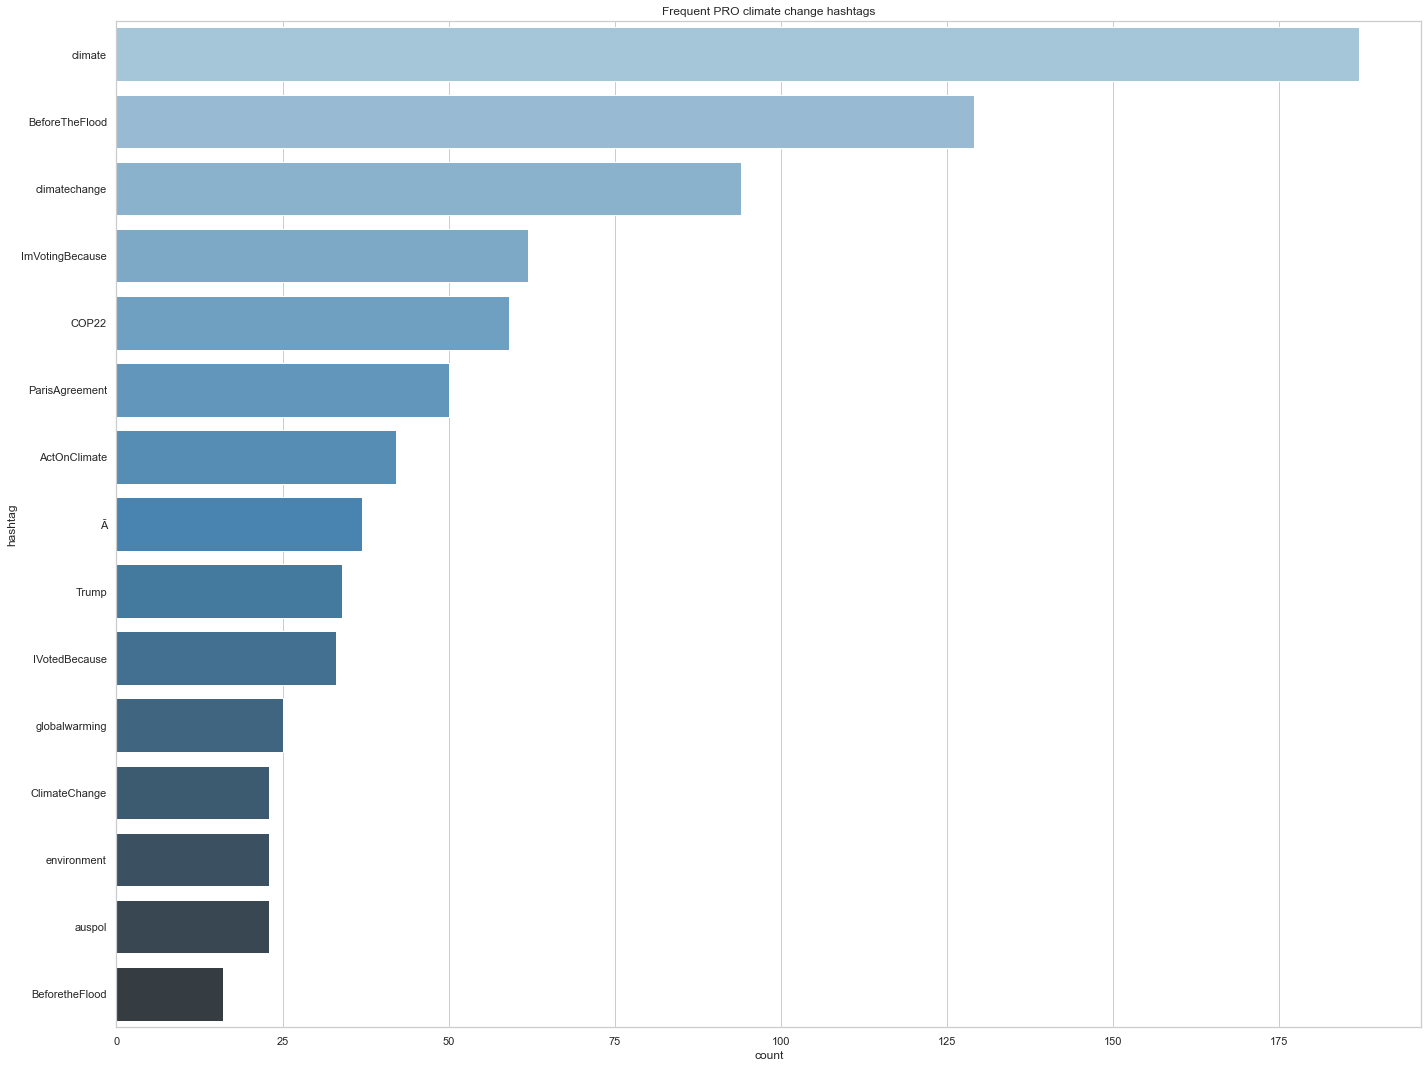

In [58]:
# Plot the frequent hastags for pro and anti climate change classes
sns.barplot(data=pro,y=pro['hashtag'], x=pro['count'], palette=("Blues_d"))
plt.title('Frequent PRO climate change hashtags')
plt.tight_layout()

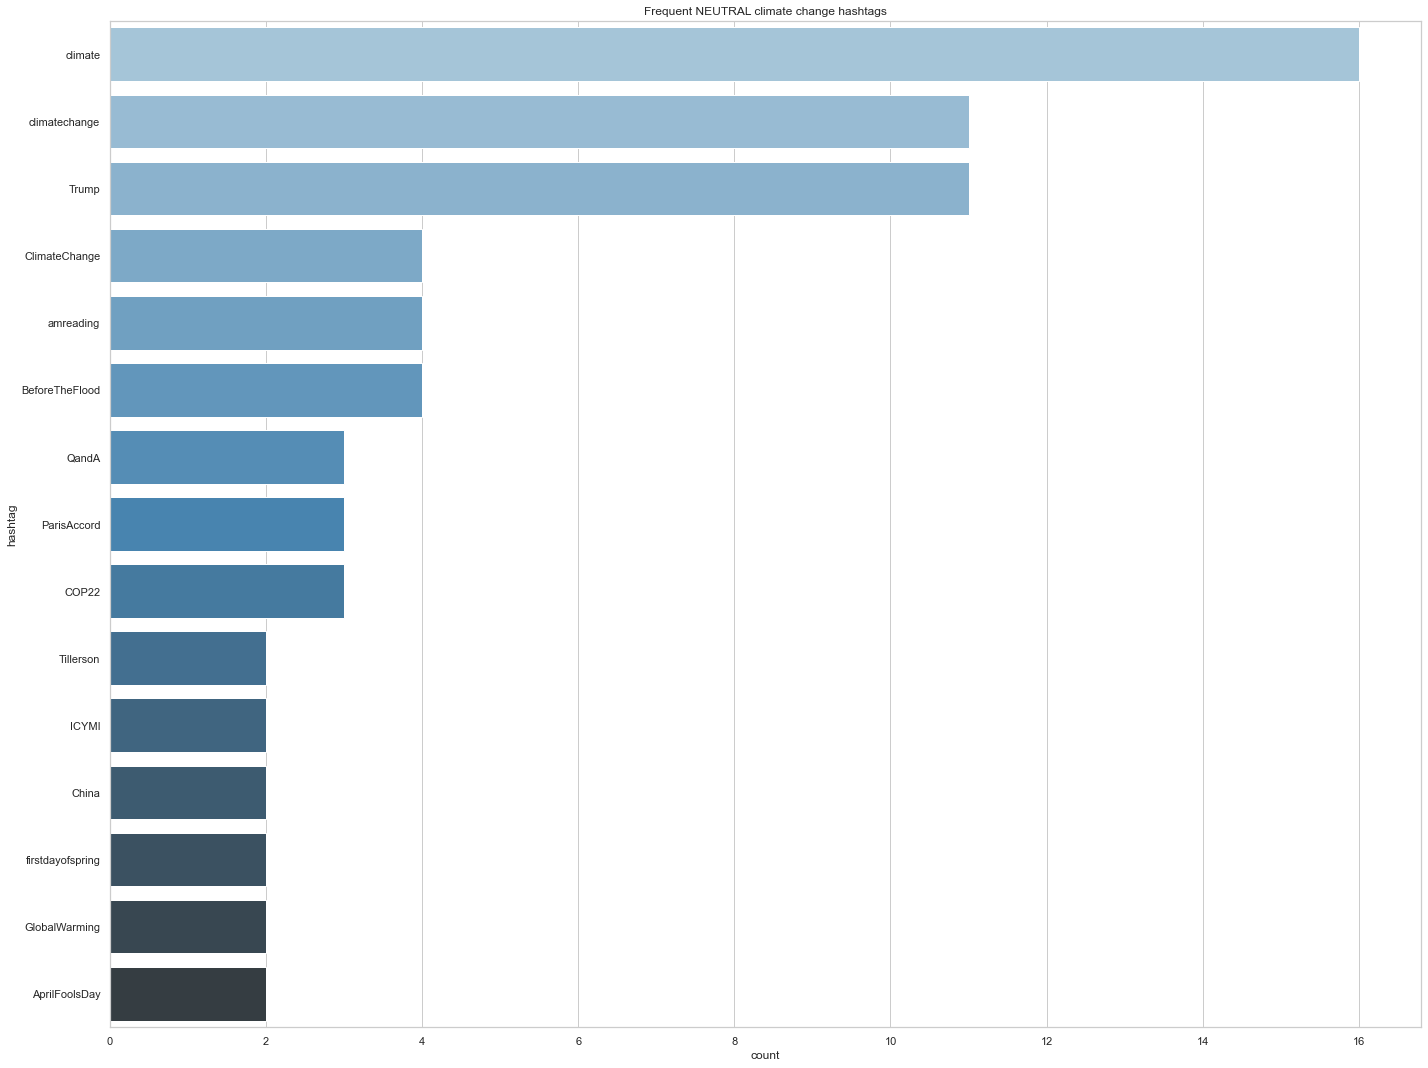

In [59]:
sns.barplot(y=neutral['hashtag'], x=neutral['count'], palette=("Blues_d"))
plt.title('Frequent NEUTRAL climate change hashtags')
plt.tight_layout()

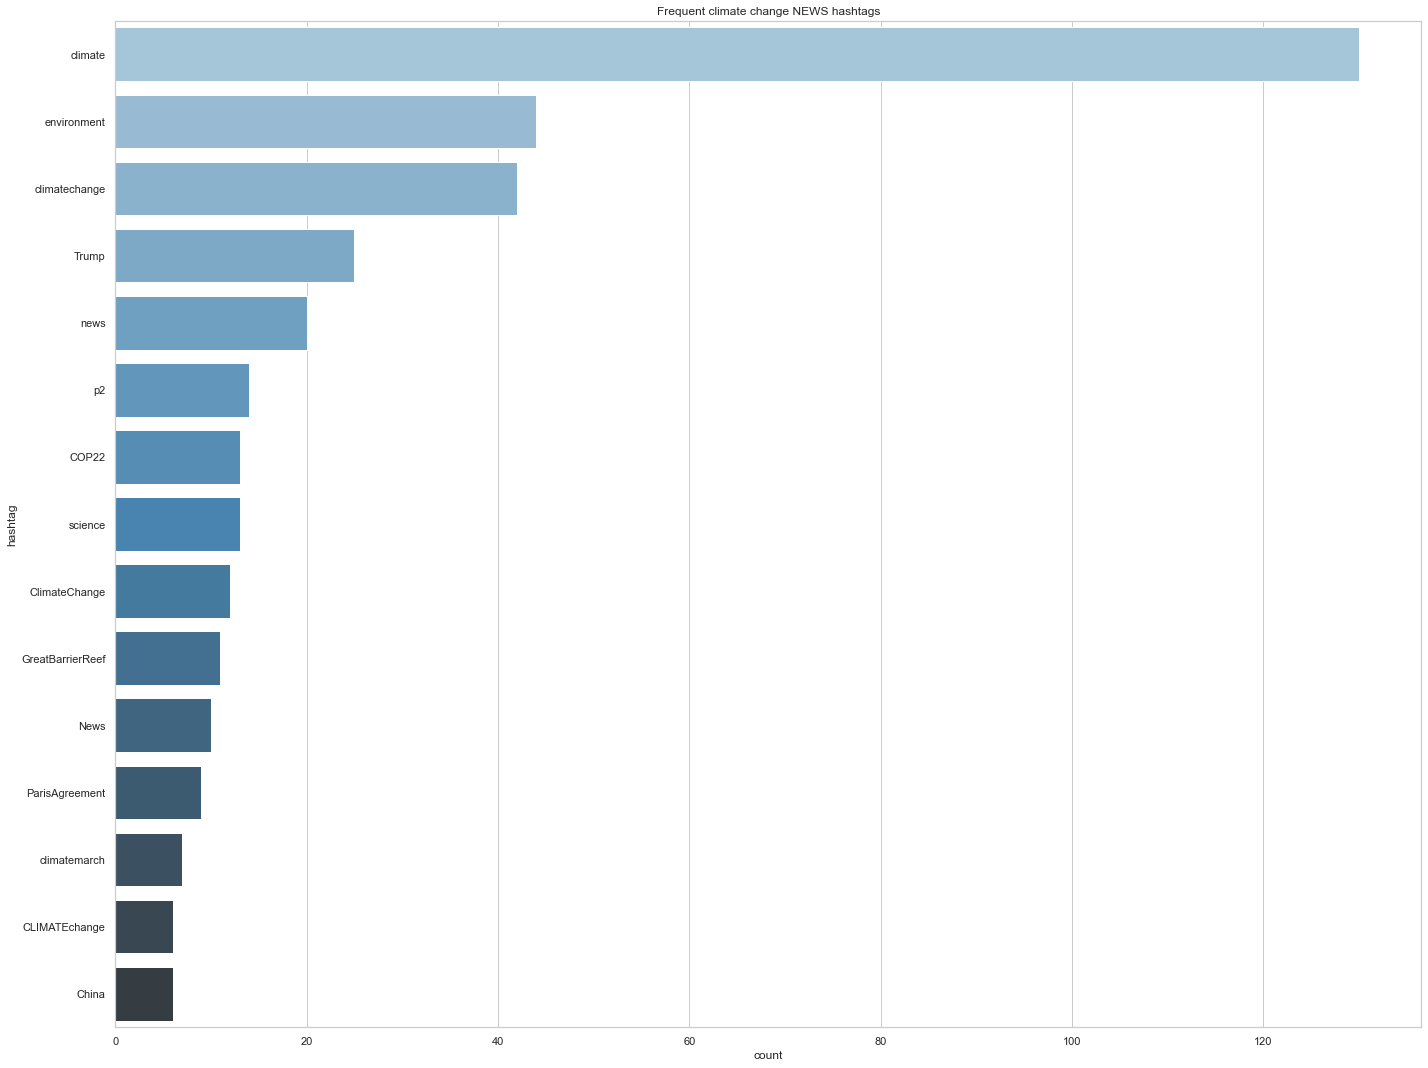

In [60]:
# Plot the frequent hastags for the news and neutral classes
sns.barplot(y=news['hashtag'], x=news['count'], palette=("Blues_d"))
plt.title('Frequent climate change NEWS hashtags')
plt.tight_layout()

### Using the Regex library to clean the raw tweets dataframe:
Regular expressions (called REs, or regexes, or regex patterns) are essentially a tiny, highly specialized programming language embedded inside Python and made available through the re module. Using this little language, you specify the rules for the set of possible strings that you want to match; this set might contain English sentences, or e-mail addresses, or TeX commands, or anything you like. You can then ask questions such as “Does this string match the pattern?”, or “Is there a match for the pattern anywhere in this string?”. You can also use REs to modify a string or to split it apart in various ways. For more information on regular expressions.

In [34]:
# Replace email addresses with 'email'
tweets = raw_tweets.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Remove unicode strings
tweets = tweets.str.replace(r'(\\u[0-9A-Fa-f]+)', '')
tweets = tweets.str.replace(r'[^\x00-\x7f]', '')

# Convert any url to URL
tweets = tweets.str.replace('((www\.[^\s]+)|(https?://[^\s]+))',
                            'website')

# Remove special characters, numbers, punctuation
tweets = tweets.str.replace('[^a-zA-Z#@]+',' ')

# Remove additional white spaces
tweets = tweets.str.replace(r'\s+', ' ')
tweets = tweets.str.replace(r'^\s+|\s+?$', '')

# Change words to lower case
tweets = tweets.str.lower()

# Remove stop words from tweets
stop_words = set(stopwords.words('english'))

tweets = tweets.apply(lambda x: ' '.join(
    word for word in x.split() if word not in stop_words))

C:\Users\SAMSON\AppData\Local\Temp/ipykernel_6100/3802589444.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\SAMSON\AppData\Local\Temp/ipykernel_6100/3802589444.py:6: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\SAMSON\AppData\Local\Temp/ipykernel_6100/3802589444.py:7: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\SAMSON\AppData\Local\Temp/ipykernel_6100/3802589444.py:10: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\SAMSON\AppData\Local\Temp/ipykernel_6100/3802589444.py:14: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\SAMSON\AppData\Local\Temp/ipykernel_6100/3802589444.py:17: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\SAMSON\App

In [35]:
# Creating a dataframe from the cleaned up message column
tweets_df = pd.DataFrame(tweets)

# Add sentiment column to the tweets dataframe
tweets_df['sentiment'] = df_train['sentiment']

# View the top 5 rows of tweets
tweets_df.head()

,message,sentiment
0,polyscimajor epa chief think carbon dioxide ma...,1
1,like lack evidence anthropogenic global warming,1
2,rt researchers say three years act climate cha...,2
3,wired pivotal year war climate change,1
4,rt racist sexist climate change denying bigot ...,1


## 5.2 Visualising a corpus for each sentiment class:

Now we will create a corpus for each sentiment class. In linguistics, a corpus is a large and structured set of texts. In corpus linguistics, they are used to do statistical analysis and hypothesis testing, checking occurrences or validating linguistic rules within a specific language territory.

In [36]:
# Create a Corpus for every class sentiment 
news_tweets = ' '.join([text for text in tweets_df['message']
                        [tweets_df['sentiment'] == 2]])
pro_tweets = ' '.join([text for text in tweets_df['message']
                       [tweets_df['sentiment'] == 1]])
neutral_tweets = ' '.join([text for text in tweets_df['message']
                           [tweets_df['sentiment'] == 0]])
anti_tweets = ' '.join([text for text in tweets_df['message']
                        [tweets_df['sentiment'] == -1]])

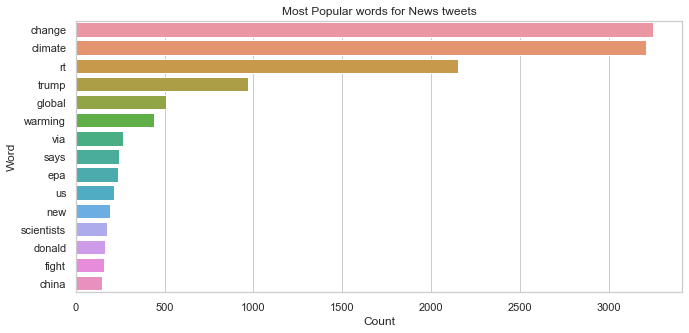

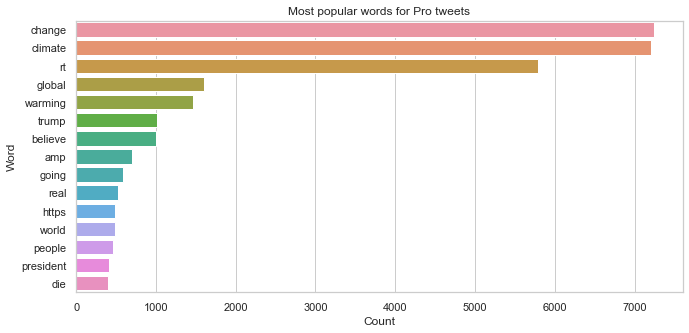

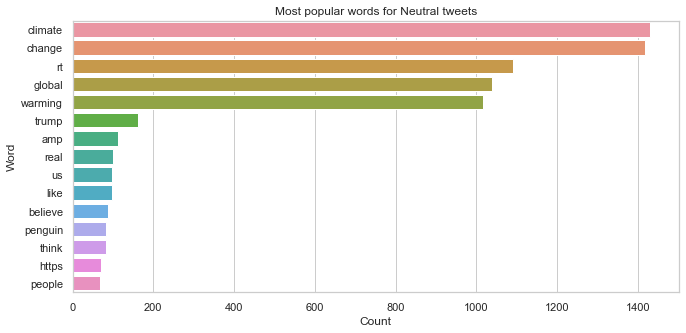

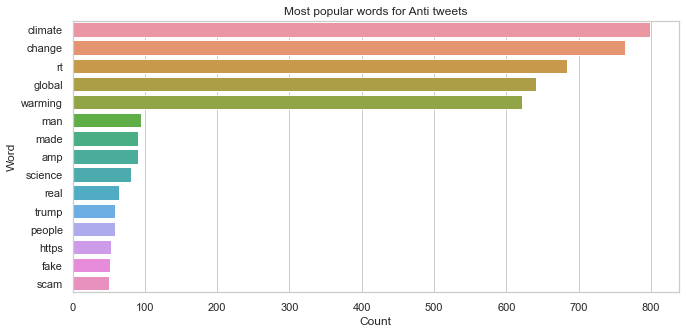

In [37]:
# Visualising each sentiment class according to the count of words
full_title = ['Most Popular words for News tweets',
              'Most popular words for Pro tweets',
              'Most popular words for Neutral tweets',
              'Most popular words for Anti tweets']

tweet_list = [news_tweets, pro_tweets,
              neutral_tweets, anti_tweets]

plt.rcParams['figure.figsize'] = [50, 5]

for i, sent in enumerate(tweet_list):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent.split(' '))
    df = pd.DataFrame({'Word': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    ax = sns.barplot(data=df, y='Word', x='Count')
    plt.title(full_title[i])
    plt.show()

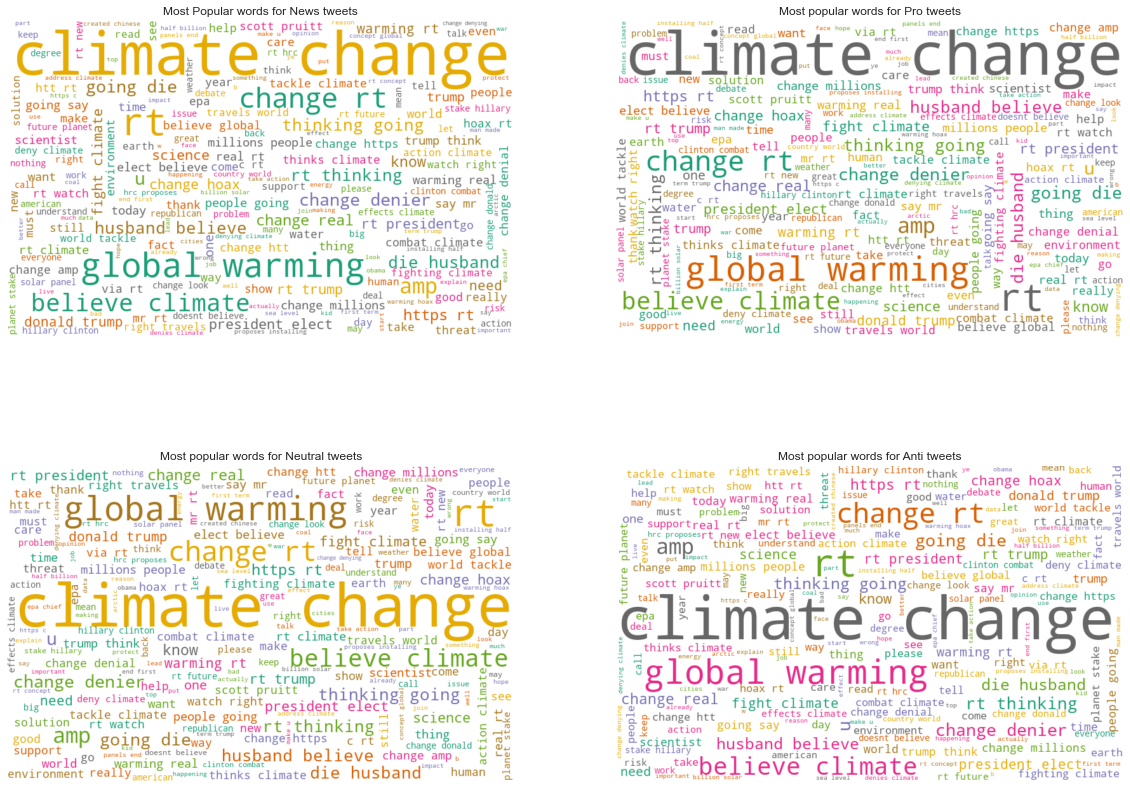

In [38]:
# Create word clouds of the most common words in each sentiment class
wc = WordCloud(width=800, height=500, 
               background_color='white', colormap='Dark2',
               max_font_size=150, random_state=42)

plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots 
for i in range(0, len(tweet_list)):
    wc.generate(tweet_list[1])
    
    plt.subplot(2, 2, i + 1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(full_title[i])
    
plt.show()

Based on the EXPLORATORY DATA ANALYSIS we have carried out, we have realised the following:
1. The data we have is free from Null values: 
> Most machine learning algorithms such as the random forest classifier, logistic regression, suport vector machine etc do not accept data with null values. We therefore aim at removing or filling up null values appropriately before feading our data in any machine learning model.

2. The data is not corerctly distributed:
> The total number of responces differ from one y value to another [ -1 has 1296 responses], [0 has 2353 responces], [1 has 8330 responces], [2 has 3640 responces]. This will be a problem to most machine learning algorithms such as the logistic regression. For a model to have equal probability of predicting each given value of y, then the total count of all y responces should be the same during the training time.

3. The data is not correctly formatted:
> Even though there are no null values. The data type of each feature in the training set do not all satisfy the expected data types. The message feature consist of the object data type which will need to be rectified before modeling.

4. There are uninvited visiters in our data:
> stop words and punctuations do impact negatively towards our model's predictive power. We therefore have to remove them in advance before they cause much trouble. 

5. There are some information that can be found in the links.
> Some of these links contain some informations ie the title talking about climate change. Will need to extract them for our analysis.


<a id="6"></a>
# 6 Data Preprocessing

<a id="6.1"></a>
## 6.1 Merge the train & test datasets:
This will allow us to preprocess the train & test data sets simultaneously.

In [61]:
# Merging both the data sets
combine_df = df_train.append(df_test, 
                             ignore_index=True,
                             sort=False)
combine_df.head(3)

,sentiment,message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,698562


In [62]:
# Combine (Merged) Data Set Information
print('Combine Data Set Info - Total Rows | Total Columns | Total Null Values')
print(combine_df.info())

Combine Data Set Info - Total Rows | Total Columns | Total Null Values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26365 entries, 0 to 26364
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sentiment  15819 non-null  float64
 1   message    26365 non-null  object 
 2   tweetid    26365 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 618.1+ KB
None


<a id="6.2"></a>
## 6.2 Converting Hypertext Markup Language(HTML) entities:
An HTMLParser instance is fed HTML data and calls handler methods when start tags, end tags, text, comments, and other markup elements are encountered. Removal of words in our data like '&amp', '&lt' (which are basically used in HTML).

In [63]:
import bs4
combine_df['clean_message'] = combine_df['message'].apply(lambda x: bs4.BeautifulSoup(x, 'lxml').get_text())

In [64]:
import string
def remove_punctuation(clean_message):
    return ''.join([l for l in clean_message if l not in string.punctuation])

In [65]:
combine_df['clean_message'] = combine_df['clean_message'].apply(remove_punctuation)

In [69]:
combine_df.head(5)

,sentiment,message,tweetid,clean_message
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,PolySciMajor EPA chief doesnt think carbon dio...
1,1.0,It's not like we lack evidence of anthropogeni...,126103,Its not like we lack evidence of anthropogenic...
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,RT RawStory Researchers say we have three year...
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,TodayinMaker WIRED 2016 was a pivotal year in...
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,RT SoyNovioDeTodas Its 2016 and a racist sexis...


<a id="6.3"></a>
## 6.3 Changing all the Tweets into lowercase:
The following changes all the messeges in the 'clean_message' column of the dataframe into lowercase. 

In [70]:
combine_df['clean_message'] = combine_df['clean_message'].apply(lambda x: x.lower())
combine_df.head(3)

,sentiment,message,tweetid,clean_message
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor epa chief doesnt think carbon dio...
1,1.0,It's not like we lack evidence of anthropogeni...,126103,its not like we lack evidence of anthropogenic...
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,rt rawstory researchers say we have three year...


<a id="6.4"></a>
## 6.4 Word Tokenization:
NLTK provides a function called word_tokenize() for splitting strings into tokens (nominally words). It splits tokens based on white space and punctuation. For example, commas and periods are taken as separate tokens.

In [71]:
# Creating token for the clean tweets
combine_df['tweet_token'] = combine_df['clean_message'].apply(lambda x: word_tokenize(x))

## Fully formated tweets & there tokens
combine_df.head(3)

,sentiment,message,tweetid,clean_message,tweet_token
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb..."
1,1.0,It's not like we lack evidence of anthropogeni...,126103,its not like we lack evidence of anthropogenic...,"[its, not, like, we, lack, evidence, of, anthr..."
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,rt rawstory researchers say we have three year...,"[rt, rawstory, researchers, say, we, have, thr..."


<a id="6.5"></a>
## 6.5 Removing Stop Words:
What we can see is that stop words are the most used, but in fact they don't help us determine if a tweet is happy/sad, however, they are consuming memory and they are making the learning process slower, so we really need to get rid of them.

In [72]:
# Importing stop words from NLTK corpus for english language
stop_words = set(stopwords.words('english'))

In [73]:
# Created new columns of tokens without stop words
combine_df['tweet_token_filtered'] = combine_df['tweet_token'
                                               ].apply(lambda x:[word for word in x if not word in stop_words])

# Tokenized columns with stop words and without stop words
combine_df[['tweet_token', 'tweet_token_filtered']].head(3)

,tweet_token,tweet_token_filtered
0,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,"[its, not, like, we, lack, evidence, of, anthr...","[like, lack, evidence, anthropogenic, global, ..."
2,"[rt, rawstory, researchers, say, we, have, thr...","[rt, rawstory, researchers, say, three, years,..."


<a id="6.6"></a>
## 6.6 Word Stemming:
There are words that have the same meaning, but written in a different manner, sometimes in the plural and sometimes with a suffix (ing, es ...), this will make our model think that they are different words and also make our vocabulary bigger (waste of memory and time for the learning process). The solution is to reduce those words with the same root, this is called stemming. Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach.

In [75]:
# Created one more columns tweet_stemmed
from nltk.stem import SnowballStemmer
stemming = SnowballStemmer('english')
combine_df['tweet_stemmed'] = combine_df['tweet_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
combine_df.head(3)

,sentiment,message,tweetid,clean_message,tweet_token,tweet_token_filtered,tweet_stemmed
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...",polyscimajor epa chief doesnt think carbon dio...
1,1.0,It's not like we lack evidence of anthropogeni...,126103,its not like we lack evidence of anthropogenic...,"[its, not, like, we, lack, evidence, of, anthr...","[like, lack, evidence, anthropogenic, global, ...",like lack evid anthropogen global warm
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,rt rawstory researchers say we have three year...,"[rt, rawstory, researchers, say, we, have, thr...","[rt, rawstory, researchers, say, three, years,...",rt rawstori research say three year act climat...


<a id="7"></a>
# 7. Feature Engineering

<a id="7.1"></a>
## **7.1 Split data into Train & Test sets:**
Now that our Preprocessing is complete, we can separate the data back into the train & test sets.

#### Train - Validation split

Before we pass our data through our custom pipelines we have to split our train data into features and target variables. After this step we can split our train data into a train and validation set. This will allow us to evaluate our model performance and chose the best model to use for our submission

In [76]:
# Splitting the data into train & test
train = combine_df[:15819]
test = combine_df[15819:].drop(['sentiment'], axis=1)

In [109]:
# Split the dataset into train & validation (20%) for model training

# Seperate features and tagret variables
X = train['message']
y = train['sentiment']

In [111]:

# Split the train data to create validation dataset
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
# Random Forest Classifier
rf = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', RandomForestClassifier(max_depth=5, 
                                              n_estimators=100))])

# Naïve Bayes:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB())])

# K-NN Classifier
knn = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', KNeighborsClassifier(n_neighbors=5, 
                                             metric='minkowski', 
                                             p=2))])

# Logistic Regression
lr = Pipeline([('tfidf',TfidfVectorizer()),
               ('clf',LogisticRegression(C=1, 
                                         class_weight='balanced', 
                                         max_iter=1000))])
# Linear SVC:
lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                 ('clf', LinearSVC(class_weight='balanced'))])

## Model evaluation

The performance of each model will be evaluated based on the precision, accuracy and F1 score achieved when the model is used to predict the classes for the validation data. We will be looking at the following to determine and visualize these metrics:

Classification report
Confusion matrix
The best model will be selected based on the weighted F1 score.

In [113]:
# Random forest 
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_valid)

# Niave bayes
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_valid)

# K - nearest neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_valid)

# Linear regression
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_valid)

# Linear SVC
lsvc.fit(X_train, y_train)
y_pred_lsvc = lsvc.predict(X_valid)

<a id="7.3"></a>
## 7.3 Building the pipeline:
It's always a good practice to make a pipeline of transformation for your data, it will make the process of data transformation really easy and reusable. We will implement a pipeline for transforming our tweets to something that our ML models can digest (vectors).

C:\Users\SAMSON\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\SAMSON\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\SAMSON\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       278
         0.0       0.00      0.00      0.00       425
         1.0       0.55      1.00      0.71      1755
         2.0       0.00      0.00      0.00       706

    accuracy                           0.55      3164
   macro avg       0.14      0.25      0.18      3164
weighted avg       0.31      0.55      0.40      3164



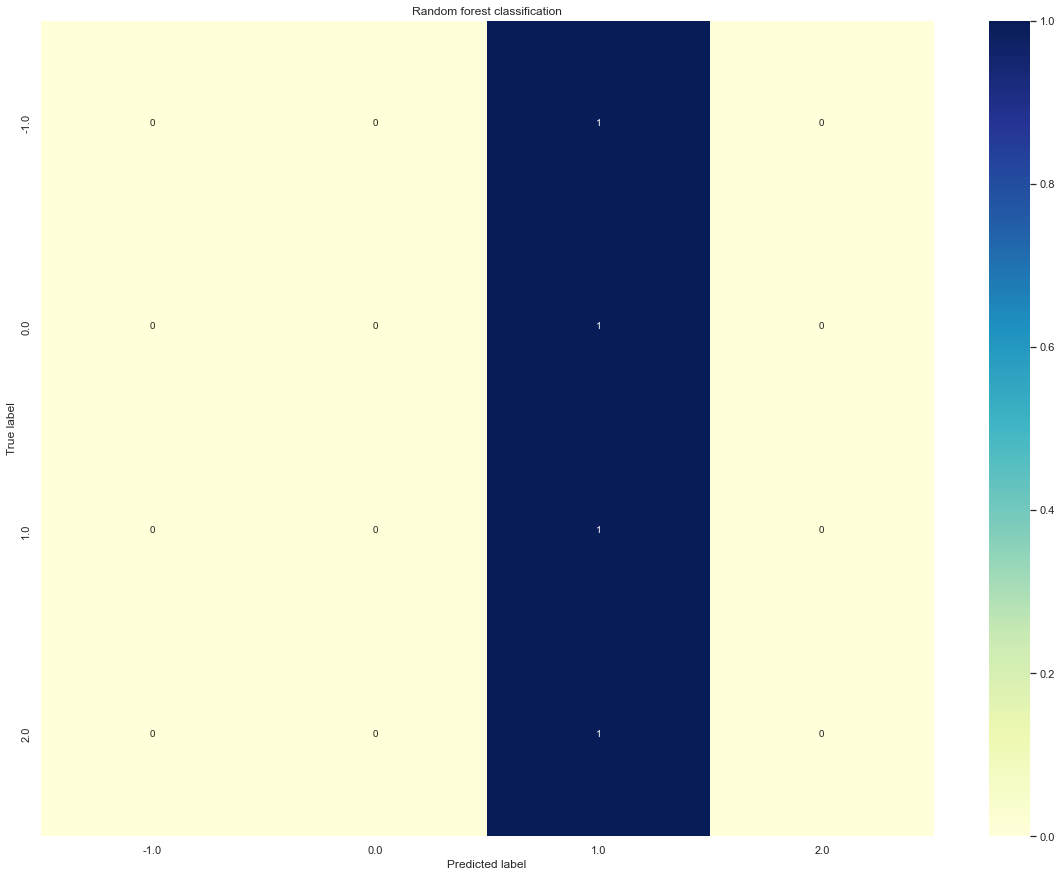

In [114]:
# Generate a classification Report for the random forest model
print(metrics.classification_report(y_valid, y_pred_rf))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_valid, y_pred_rf)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=rf.classes_, 
            yticklabels=rf.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Random forest classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### K Nearest Neighbors classification
KNN Classifier would use one of the distance criteria to classify the new datapoint class.

              precision    recall  f1-score   support

        -1.0       0.58      0.42      0.49       278
         0.0       0.48      0.41      0.44       425
         1.0       0.74      0.81      0.77      1755
         2.0       0.69      0.68      0.68       706

    accuracy                           0.69      3164
   macro avg       0.62      0.58      0.60      3164
weighted avg       0.68      0.69      0.68      3164



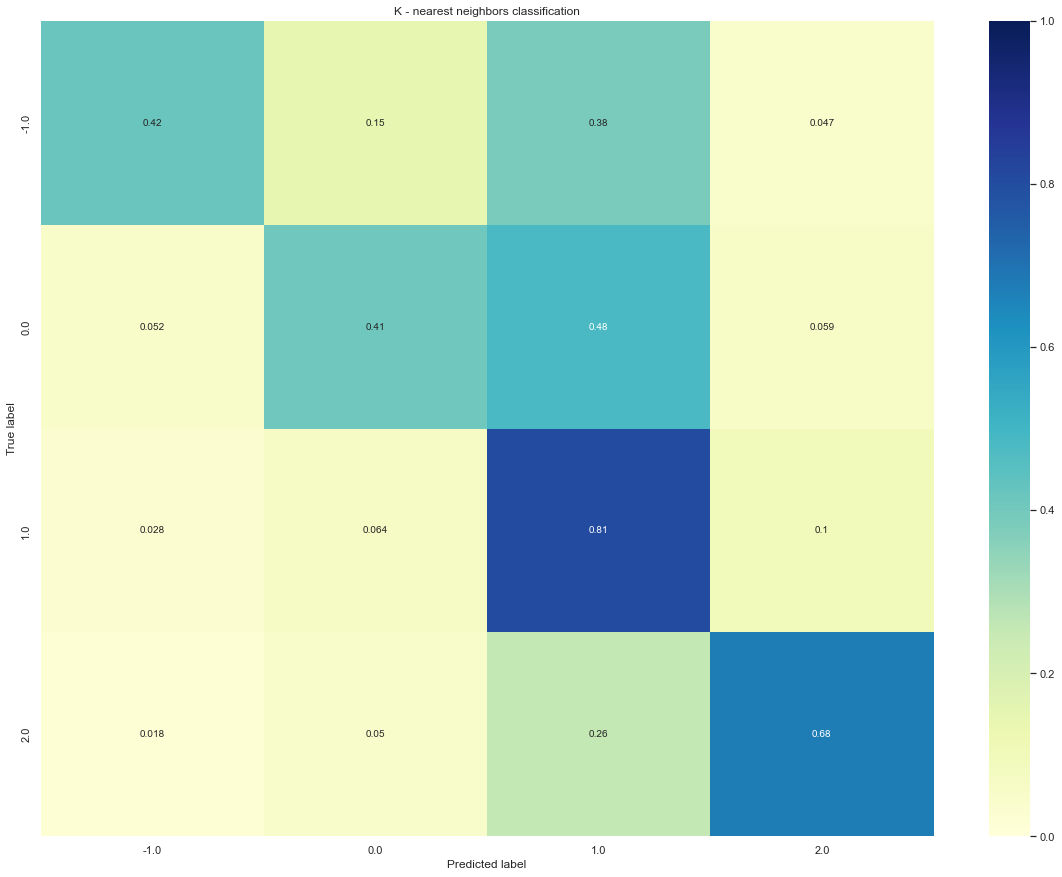

In [115]:
# Generate a classification Report for the K-nearest neighbors model
print(metrics.classification_report(y_valid, y_pred_knn))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_valid, y_pred_knn)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=knn.classes_, 
            yticklabels=knn.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('K - nearest neighbors classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

              precision    recall  f1-score   support

        -1.0       0.58      0.42      0.49       278
         0.0       0.48      0.41      0.44       425
         1.0       0.74      0.81      0.77      1755
         2.0       0.69      0.68      0.68       706

    accuracy                           0.69      3164
   macro avg       0.62      0.58      0.60      3164
weighted avg       0.68      0.69      0.68      3164



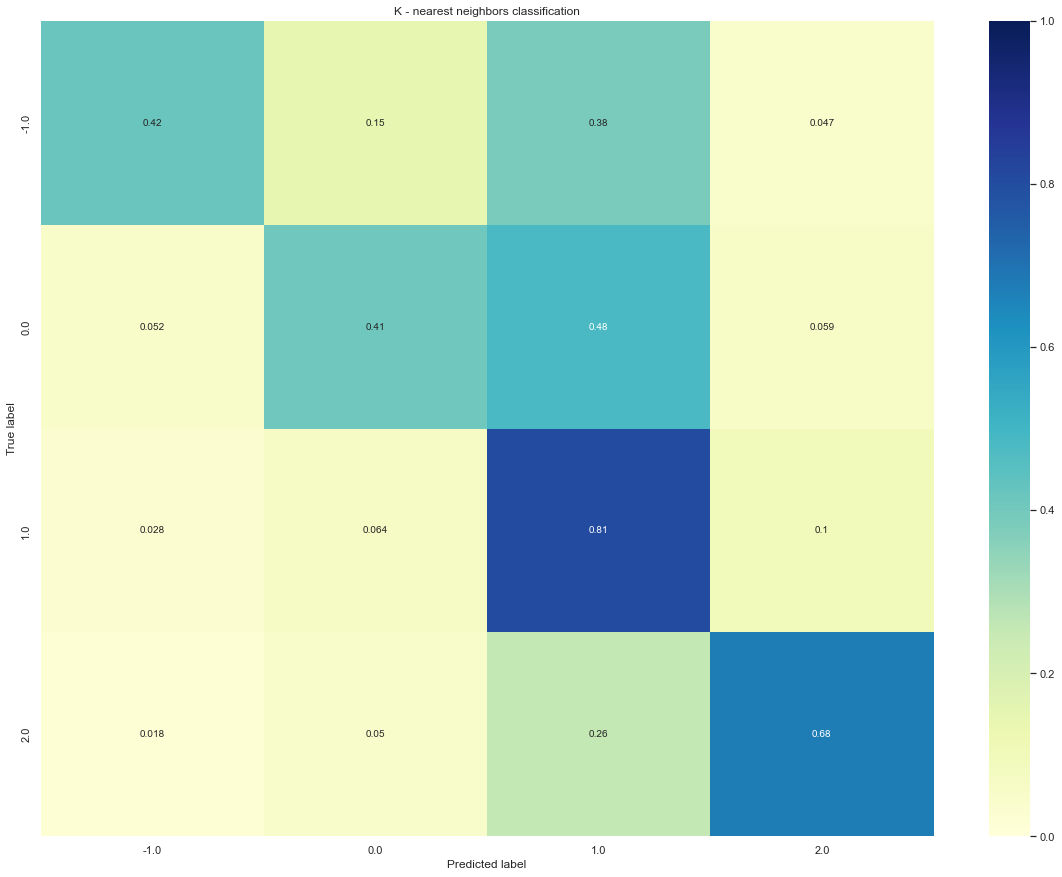

In [116]:
# Generate a classification Report for the K-nearest neighbors model
print(metrics.classification_report(y_valid, y_pred_knn))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_valid, y_pred_knn)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=knn.classes_, 
            yticklabels=knn.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('K - nearest neighbors classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


#### Logistic regression classification

              precision    recall  f1-score   support

        -1.0       0.55      0.64      0.59       278
         0.0       0.48      0.55      0.51       425
         1.0       0.85      0.69      0.76      1755
         2.0       0.66      0.87      0.75       706

    accuracy                           0.71      3164
   macro avg       0.64      0.69      0.65      3164
weighted avg       0.73      0.71      0.71      3164



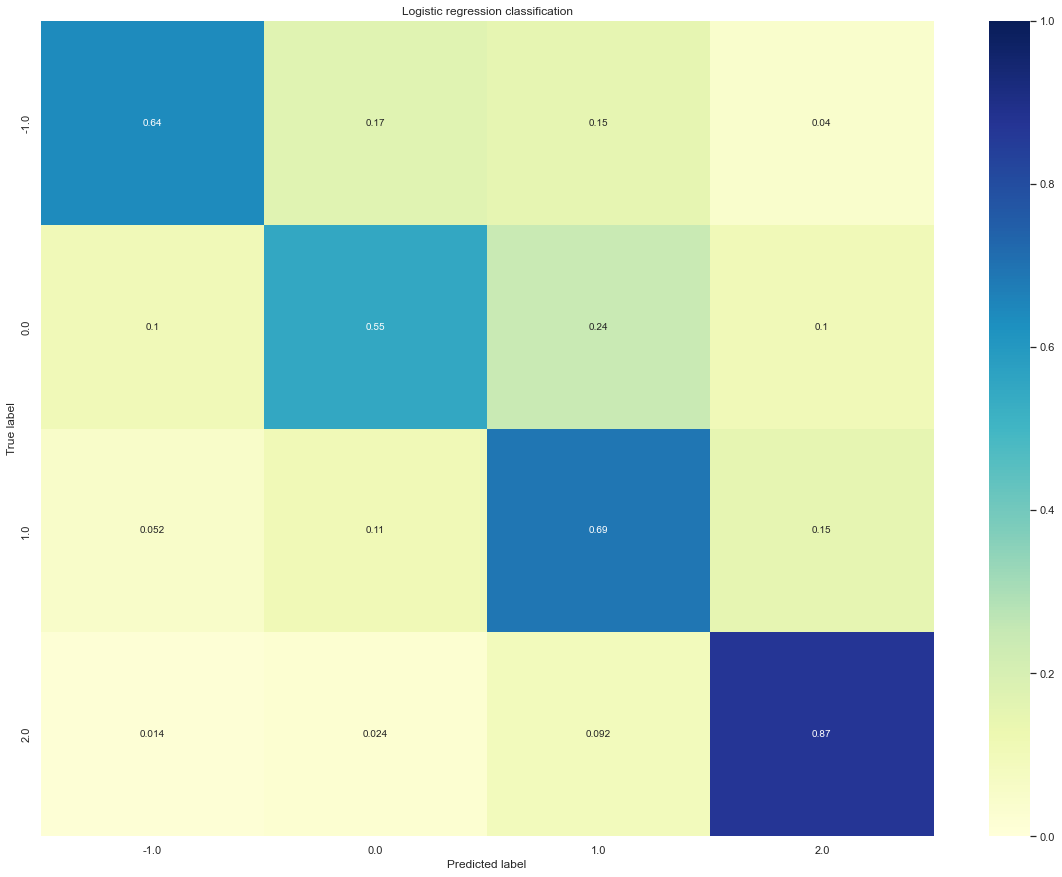

In [117]:
# Generate a classification Report for the model
print(metrics.classification_report(y_valid, y_pred_lr))

cm = confusion_matrix(y_valid, y_pred_lr)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=lr.classes_, 
            yticklabels=lr.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Logistic regression classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Model Selection

Linear SVC has achieved the highest F1 score of 0.75 and is therefore our model of choice moving forward.

#### Hyperparameter tuning

Once our top performing model has been selected, we attempt to improve it by performing some hyperparameter tuning.

After the optimal parameters are determined the linear SVC model is retrained using these parameters, resulting in a 2% increase in the F1 score.

In [118]:
# Retrain linear SVC using optimal hyperparameters:
lsvc_op = Pipeline([('tfidf', TfidfVectorizer(max_df=0.8,
                                                    min_df=2,
                                                    ngram_range=(1,2))),
                  ('clf', LinearSVC(C=0.3,
                                    class_weight='balanced',
                                    max_iter=8000))])

# Fit and predict
lsvc_op.fit(X_train, y_train)
y_pred = lsvc_op.predict(X_valid)

print('F1 score improved by',
      round(100*((metrics.accuracy_score(y_pred, y_valid) - metrics.accuracy_score(y_pred_lsvc, y_valid)) /metrics.accuracy_score(y_pred_lsvc, y_valid)),0), 
      '%')

F1 score improved by 3.0 %


In [122]:
submission1 = lsvc_op.predict(test['message'])
# Appending the prediction results to the test set, in a new column called 'sentiment'
output = pd.DataFrame( data = {'tweetid': df_test['tweetid'],
                               'sentiment': submission1 })

# Creating a csv file
output.to_csv('submission_final.csv', index = False, quoting = 3)